#📌 Extracción

In [200]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [202]:
# Convertir cada fila a un diccionario "plano" (lista de registros)
registros = df.to_dict(orient='records')

In [201]:
# Aplanar / normalizar los diccionarios anidados en columnas planas
df_normalizado = pd.json_normalize(registros)
# Reemplazar puntos por guiones bajos en los nombres de columnas para facilitar su uso
df_normalizado.columns = df_normalizado.columns.str.replace('.', '_').str.lower()
df_normalizado.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [203]:
# mostrar todas las columnas
pd.set_option('display.max_columns', None)
df_normalizado.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [204]:
# dimesiones del dataframe(filas, columnas)
df_normalizado.shape

(7267, 21)

In [75]:
# Información detallada: tipo por columna y conteo de non-null
df_normalizado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [76]:
# Mostrar sólo los dtypes en forma compacta para ver rápidamente qué columnas son numéricas vs categóricas.
df_normalizado.dtypes

,0
customerid,object
churn,object
customer_gender,object
customer_seniorcitizen,int64
customer_partner,object
customer_dependents,object
customer_tenure,int64
phone_phoneservice,object
phone_multiplelines,object
internet_internetservice,object


In [77]:
# df
df = df_normalizado

In [78]:
# Conteo  de nulos por columna
df.isnull().sum().sort_values(ascending=False)

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [79]:
# mostrar las fila 2232
df.iloc[2232]


,2232
customerid,3115-CZMZD
churn,No
customer_gender,Male
customer_seniorcitizen,0
customer_partner,No
customer_dependents,Yes
customer_tenure,0
phone_phoneservice,Yes
phone_multiplelines,No
internet_internetservice,No


In [80]:
# Duplicados exactos
n_duplicados = df.duplicated(keep=False).sum()
print("Duplicados exactos (total filas que forman duplicados):", n_duplicados)

# Mostrar ejemplos (si existen)
if n_duplicados > 0:
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))



Duplicados exactos (total filas que forman duplicados): 0


In [81]:
# 1. Ver el tipo real
print(df['account_charges_total'].head())
print(df['account_charges_total'].dtype)

# 2. Convertir todo a string ANTES de limpiar
df['account_charges_total'] = df['account_charges_total'].astype(str)

# 3. Limpiar caracteres problemáticos
df['account_charges_total'] = (
    df['account_charges_total']
    .str.replace(",", "", regex=False)
    .str.replace("'", "", regex=False)
    .str.replace(" ", "", regex=False)
)

# 4. Convertir de forma segura a número
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

# 5. Ver resultado
df['account_charges_total'].head()


0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: account_charges_total, dtype: object
object


,account_charges_total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [83]:
df['account_charges_total'].isnull().sum()

np.int64(11)

In [84]:
df[df['account_charges_total'].isna()]


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [85]:
#rellenar los valores nulos con 0
df['account_charges_total'] = df['account_charges_total'].fillna(0)

In [86]:
# listar columnas categoricas
categoricas = df.select_dtypes(include=['object']).columns
categoricas


Index(['customerid', 'churn', 'customer_gender', 'customer_partner',
       'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
       'internet_internetservice', 'internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod'],
      dtype='object')

In [87]:
# verificar valores unicos
for col in categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())

Valores únicos en la columna 'customerid':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores únicos en la columna 'churn':
['No' 'Yes' '']
Valores únicos en la columna 'customer_gender':
['Female' 'Male']
Valores únicos en la columna 'customer_partner':
['Yes' 'No']
Valores únicos en la columna 'customer_dependents':
['Yes' 'No']
Valores únicos en la columna 'phone_phoneservice':
['Yes' 'No']
Valores únicos en la columna 'phone_multiplelines':
['No' 'Yes' 'No phone service']
Valores únicos en la columna 'internet_internetservice':
['DSL' 'Fiber optic' 'No']
Valores únicos en la columna 'internet_onlinesecurity':
['No' 'Yes' 'No internet service']
Valores únicos en la columna 'internet_onlinebackup':
['Yes' 'No' 'No internet service']
Valores únicos en la columna 'internet_deviceprotection':
['No' 'Yes' 'No internet service']
Valores únicos en la columna 'internet_techsupport':
['Yes' 'No' 'No internet service']
Valores únicos en la columna 'in

In [88]:
# mostrar registros del cliente faltantes si dejo o no dejo la empresa
df_clientes = df[df['churn'] == '']
df_clientes

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [89]:
# eliminar datos inconsistentes de la columna churn para un mejor analisis
df = df[df['churn'] != '']
df

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [90]:
#verificar los valores
df['churn'].value_counts()


,count
churn,
No,5174
Yes,1869


In [91]:
# colunmas que presentas inconsistencias
columnas_servicios = [
    'phone_multiplelines',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies'
]

In [92]:
#normalizar las categorias
for col in columnas_servicios:
    df[col] = df[col].replace('No internet service', 'No')

/tmp/ipython-input-1294203365.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
# verificar los datos
for col in columnas_servicios:
    print(col, df[col].unique())


phone_multiplelines ['No' 'Yes' 'No phone service']
internet_onlinesecurity ['No' 'Yes']
internet_onlinebackup ['Yes' 'No']
internet_deviceprotection ['No' 'Yes']
internet_techsupport ['Yes' 'No']
internet_streamingtv ['Yes' 'No']
internet_streamingmovies ['No' 'Yes']


In [94]:
# estandarizaron todas las variables categóricas
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,yes,no,no,yes,no,no,one year,no,mailed check,55.15,742.90
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,no,no,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,yes,no,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65


In [95]:
# craear la columnas cuentas diarias
df['account_daily_charges'] = df['account_charges_monthly'] / 30

In [96]:
df[['account_charges_monthly', 'account_daily_charges']].head()

,account_charges_monthly,account_daily_charges
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [97]:
# Convertir valores categóricos tipo "yes" / "no" a binarios (1 / 0)
binary_map = {'yes': 1, 'no': 0}

cols_binary = [
    'churn',
    'customer_partner',
    'customer_dependents',
    'phone_phoneservice',
    'account_paperlessbilling'

]

for col in cols_binary:
    df[col] = df[col].map(binary_map)


In [98]:
# renombrar las columnas para mayor claridad en los analisis posteriores
df = df.rename(columns={
    'customer_gender': 'gender',
    'customer_seniorcitizen': 'senior_citizen',
    'customer_partner': 'partner',
    'customer_dependents': 'dependents',
    "customer_tenure": "tenure_months",
    "phone_phoneservice": "phone_service",
    "phone_multiplelines": "multiple_lines",
    "internet_internetservice": "internet_service_type",
    "internet_onlinesecurity": "online_security",
    "internet_onlinebackup": "online_backup",
    "internet_deviceprotection": "device_protection",
    "internet_techsupport": "tech_support",
    "internet_streamingtv": "streaming_tv",
    "internet_streamingmovies": "streaming_movies",
    "account_contract": "contract_type",
    "account_paperlessbilling": "paperless_billing",
    "account_paymentmethod": "payment_method",
    "account_charges_monthly": "monthly_charges",
    "account_charges_total": "total_charges",
    "account_daily_charges": "daily_charges"
})



In [99]:
df.head()

,customerid,churn,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber optic,no,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,no,fiber optic,no,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [100]:
tabla_descriptiva = df.describe().round(2)

In [101]:
tabla_descriptiva.style \
    .format("{:.2f}") \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
    ])


,churn,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,daily_charges
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,0.48,0.30,32.37,0.90,0.59,64.76,2279.73,2.16
std,0.44,0.37,0.50,0.46,24.56,0.30,0.49,30.09,2266.79,1.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,0.00,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,35.50,398.55,1.18
50%,0.00,0.00,0.00,0.00,29.00,1.00,1.00,70.35,1394.55,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.00,1.00,89.85,3786.60,2.99
max,1.00,1.00,1.00,1.00,72.00,1.00,1.00,118.75,8684.80,3.96


In [102]:
# verificación de los valores de churn
df['churn'].value_counts()

,count
churn,
0,5174
1,1869


In [103]:
tabla_churn = (
    df['churn']
    .value_counts()
    .to_frame(name='count')
)

tabla_churn['percentage'] = (
    df['churn']
    .value_counts(normalize=True) * 100
)



In [104]:
tabla_churn = tabla_churn.round(2)
tabla_churn_reset = tabla_churn.reset_index()

In [105]:
tabla_churn.style \
    .format({'percentage': '{:.2f} %'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
    ])


,count,percentage
churn,,
0,5174,73.46 %
1,1869,26.54 %


In [106]:
tabla_churn_plotly = (
    df['churn']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

tabla_churn_plotly.columns = ['churn', 'percentage']

# Convertimos churn a texto para mejor lectura
tabla_churn_plotly['churn'] = tabla_churn_plotly['churn'].map({
    0: 'Clientes que se quedan',
    1: 'Clientes que se van'
})




In [107]:
import plotly.express as px

fig = px.bar(
    tabla_churn_plotly,
    x='churn',
    y='percentage',
    text='percentage',
    color='churn',
    color_discrete_map={
        'Clientes que se quedan': '#2ecc71',  # verde
        'Clientes que se van': '#e74c3c'      # rojo
    },
    title='Distribución de Clientes: Retención vs Evasión'
)

fig.update_traces(
    texttemplate='%{text}%',
    textposition='outside'
)

fig.update_layout(
    width=700,   # tamaño medio
    height=450,
    xaxis_title='Estado del Cliente',
    yaxis_title='Porcentaje de Clientes (%)',
    yaxis_range=[0, tabla_churn_plotly['percentage'].max() + 5],
    showlegend=False,
    title_x=0.5
)

fig.show()




In [108]:
fig_pie = px.pie(
    tabla_churn_plotly,
    names='churn',
    values='percentage',
    color='churn',
    color_discrete_map={
        'Clientes que se quedan': '#2ecc71',
        'Clientes que se van': '#e74c3c'
    },
    title='Proporción de Evasión de Clientes'
)

fig_pie.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=0.4  # dona (más moderna)
)

fig_pie.update_layout(
    width=500,
    height=400,
    title_x=0.5
)

fig_pie.show()

In [109]:
# Analizar cómo se distribuye el churn (evasión) en función de variables categóricas
evasion_genero_df = pd.crosstab(
    df['gender'],
    df['churn'],
    normalize='index'
)

evasion_genero_df.columns = [
    'CLIENTES QUE PERMANECEN',
    'CLIENTES QUE SE DAN DE BAJA'
]

evasion_genero_df.index = ['FEMENINO', 'MASCULINO']
evasion_genero_df.index.name = "TIPO DE GÉNERO"

evasion_genero_df = (evasion_genero_df * 100).round(2)
evasion_genero_df

,CLIENTES QUE PERMANECEN,CLIENTES QUE SE DAN DE BAJA
TIPO DE GÉNERO,,
FEMENINO,73.08,26.92
MASCULINO,73.84,26.16


In [110]:
# estilización de la tabla
evasion_genero_style = evasion_genero_df.style \
    .format("{:.2f}%") \
    .set_caption("DISTRIBUCIÓN DE EVASIÓN POR GÉNERO") \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
evasion_genero_style


,CLIENTES QUE PERMANECEN,CLIENTES QUE SE DAN DE BAJA
TIPO DE GÉNERO,,
FEMENINO,73.08%,26.92%
MASCULINO,73.84%,26.16%


In [111]:
plot_df = evasion_genero_df.reset_index().melt(
    id_vars='TIPO DE GÉNERO',
    var_name='ESTADO',
    value_name='PORCENTAJE'
)

fig = px.bar(
    plot_df,
    x='TIPO DE GÉNERO',
    y='PORCENTAJE',
    color='ESTADO',
    barmode='group',
    text='PORCENTAJE',
    title='EVASIÓN DE CLIENTES SEGÚN GÉNERO',
    color_discrete_map={
        'CLIENTES QUE PERMANECEN': '#2ECC71',   # Verde
        'CLIENTES QUE SE DAN DE BAJA': '#E74C3C' # Rojo
    }
)

fig.update_layout(
    width=700,
    height=500,
    xaxis_title='GÉNERO',
    yaxis_title='PORCENTAJE (%)',
    legend_title='ESTADO DEL CLIENTE',
    yaxis=dict(range=[0, 100])
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

fig.show()



In [112]:
evasion_contrato = (pd.crosstab(df['contract_type'],df['churn'], normalize='index'))
evasion_contrato.columns = ['CLIENTES QUE PERMANECEN', 'CLIENTES QUE SE DAN DE BAJA']
evasion_contrato.index = evasion_contrato.index.str.upper()
evasion_contrato = (evasion_contrato * 100).round(2)
evasion_contrato = evasion_contrato.rename(index={
    'MONTH-TO-MONTH': 'MES A MES',
    'ONE YEAR': 'UN AÑO',
    'TWO YEAR': 'DOS AÑOS'
})
evasion_contrato.index.name = "TIPO DE CONTRATO"


In [113]:
evasion_contato_style = evasion_contrato.style \
    .format("{:.2f}%") \
    .set_caption("DISTRIBUCIÓN DE EVASIÓN POR TIPO DE CONTRATO") \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
evasion_contato_style


,CLIENTES QUE PERMANECEN,CLIENTES QUE SE DAN DE BAJA
TIPO DE CONTRATO,,
MES A MES,57.29%,42.71%
UN AÑO,88.73%,11.27%
DOS AÑOS,97.17%,2.83%


In [114]:
# ===============================
# DataFrame para el gráfico
# ===============================
plot_contract = evasion_contrato.reset_index().melt(
    id_vars='TIPO DE CONTRATO',
    value_vars=['CLIENTES QUE PERMANECEN', 'CLIENTES QUE SE DAN DE BAJA'],
    var_name='ESTADO',
    value_name='PORCENTAJE'
)

# Orden lógico de los contratos
orden_contratos = ['MES A MES', 'UN AÑO', 'DOS AÑOS']

# ===============================
# Crear gráfico
# ===============================
fig = px.bar(
    plot_contract,
    x='TIPO DE CONTRATO',
    y='PORCENTAJE',
    color='ESTADO',
    barmode='group',
    text='PORCENTAJE',
    category_orders={'TIPO DE CONTRATO': orden_contratos},
    title='Evasión de clientes según tipo de contrato',
    color_discrete_map={
        'CLIENTES QUE PERMANECEN': '#2ECC71',   # Verde
        'CLIENTES QUE SE DAN DE BAJA': '#E74C3C' # Rojo
    }
)

# ===============================
# Ajustes visuales
# ===============================
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

fig.update_layout(
    width=800,
    height=500,
    yaxis=dict(
        title='Porcentaje (%)',
        range=[0, 100]
    ),
    xaxis_title='Tipo de contrato',
    legend_title='Estado del cliente',
    title_x=0.5
)

fig.show()


In [115]:
evasion_pago = pd.crosstab(
    df['payment_method'],
    df['churn'],
    normalize='index'
)

# Nombres de columnas en castellano
evasion_pago.columns = [
    'CLIENTES QUE PERMANECEN',
    'CLIENTES QUE SE DAN DE BAJA'
]

# Pasar métodos de pago a mayúsculas
evasion_pago.index = evasion_pago.index.str.upper()

# Nombre del índice
evasion_pago.index.name = "MÉTODO DE PAGO"

# Pasar a porcentaje
evasion_pago = (evasion_pago * 100).round(2)



In [116]:
evasion_pago_style = evasion_pago.style \
    .format("{:.2f}%") \
    .set_caption("DISTRIBUCIÓN DE EVASIÓN SEGÚN MÉTODO DE PAGO") \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
evasion_pago_style


,CLIENTES QUE PERMANECEN,CLIENTES QUE SE DAN DE BAJA
MÉTODO DE PAGO,,
BANK TRANSFER (AUTOMATIC),83.29%,16.71%
CREDIT CARD (AUTOMATIC),84.76%,15.24%
ELECTRONIC CHECK,54.71%,45.29%
MAILED CHECK,80.89%,19.11%


In [117]:
# ===============================
# DataFrame para el gráfico
# ===============================
plot_payment = evasion_pago.reset_index().melt(
    id_vars='MÉTODO DE PAGO',
    value_vars=['CLIENTES QUE PERMANECEN', 'CLIENTES QUE SE DAN DE BAJA'],
    var_name='ESTADO',
    value_name='PORCENTAJE'
)

# ===============================
# Crear gráfico
# ===============================
fig = px.bar(
    plot_payment,
    x='MÉTODO DE PAGO',
    y='PORCENTAJE',
    color='ESTADO',
    barmode='group',
    text='PORCENTAJE',
    title='Evasión de clientes según método de pago',
    color_discrete_map={
        'CLIENTES QUE PERMANECEN': '#2ECC71',   # Verde
        'CLIENTES QUE SE DAN DE BAJA': '#E74C3C' # Rojo
    }
)

# ===============================
# Ajustes visuales
# ===============================
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

fig.update_layout(
    width=850,
    height=500,
    yaxis=dict(
        title='Porcentaje (%)',
        range=[0, 100]
    ),
    xaxis_title='Método de pago',
    legend_title='Estado del cliente',
    title_x=0.5
)

fig.show()


In [118]:
facturacion = (
    df.groupby("paperless_billing")["churn"]
      .value_counts(normalize=True)
      .unstack() * 100
)

facturacion.columns = ["NO CHURN", "CHURN"]

facturacion



,NO CHURN,CHURN
paperless_billing,,
0,83.669916,16.330084
1,66.434908,33.565092


In [119]:
# estilizacion de la tabla facturación
facturacion.index = facturacion.index.map({
    0: "SIN FACTURACIÓN ELECTRÓNICA",
    1: "CON FACTURACIÓN ELECTRÓNICA"
})

# renombrar las columnas descriptiuvas
facturacion.columns = [
    "CLIENTES QUE PERMANECEN (%)",
    "CLIENTES QUE SE DAN DE BAJA (%)"
]

facturacion = facturacion.round(2)
facturacion.index.name = ""


In [120]:
facturacion.style \
    .format("{:.2f}") \
    .set_properties(**{
        "text-align": "center",
        "font-size": "14px"
    }) \
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#2f3e46"),
            ("color", "white"),
            ("text-align", "center")
        ]},
        {"selector": "td", "props": [
            ("background-color", "#2f3e46")
        ]}
    ]) \
    .set_caption("DISTRIBUCIÓN DE EVASIÓN SEGÚN FACTURACIÓN ELECTRÓNICA")



,CLIENTES QUE PERMANECEN (%),CLIENTES QUE SE DAN DE BAJA (%)
,,
SIN FACTURACIÓN ELECTRÓNICA,83.67,16.33
CON FACTURACIÓN ELECTRÓNICA,66.43,33.57


In [121]:
# Datos para el gráfico
df_plot = facturacion.reset_index()

fig = px.bar(
    df_plot,
    x="",
    y=[
        "CLIENTES QUE PERMANECEN (%)",
        "CLIENTES QUE SE DAN DE BAJA (%)"
    ],
    barmode="group",
    title="Impacto de la Facturación Electrónica en la Evasión de Clientes",
    labels={
        "": "Tipo de Facturación",
        "value": "Porcentaje de Clientes (%)",
        "variable": "Estado del Cliente"
    },
    color_discrete_map={
        "CLIENTES QUE PERMANECEN (%)": "#2a9d8f",
        "CLIENTES QUE SE DAN DE BAJA (%)": "#e76f51"
    }
)

# Ajustes visuales
fig.update_layout(
    width=700,
    height=450,
    title_x=0.5,
    legend_title_text="",
    yaxis=dict(ticksuffix="%"),
    template="plotly_white"
)

fig.show()




In [122]:
# evasión por servicio de internet
tabla_internet = (
    df.groupby("internet_service_type")["churn"]
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
    .rename(columns={
        0: "CLIENTES QUE PERMANECEN (%)",
        1: "CLIENTES QUE SE DAN DE BAJA (%)"
    })
)

# Convertimos a mayúsculas los índices
tabla_internet.index = tabla_internet.index.str.upper()
tabla_internet.index.name = "TIPO DE SERVICIO DE INTERNET"

# Eliminar el texto "churn" que aparece arriba
tabla_internet.columns.name = None

# Estilización
tabla_internet_style = (
    tabla_internet.style
    .format("{:.2f}%")
    .set_caption("Distribución de evasión según tipo de servicio de internet")
    .set_table_styles([
        {"selector": "th", "props": [
            ("text-align", "center"),
            ("font-weight", "bold"),
            ("background-color", "#2f3e46"),
            ("color", "white")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center")
        ]}
    ])
)

tabla_internet_style


,CLIENTES QUE PERMANECEN (%),CLIENTES QUE SE DAN DE BAJA (%)
TIPO DE SERVICIO DE INTERNET,,
DSL,81.04%,18.96%
FIBER OPTIC,58.11%,41.89%
NO,92.60%,7.40%


In [123]:
# Reset del índice (manteniendo los nombres en castellano)
df_plot = tabla_internet.reset_index()

fig = px.bar(
    df_plot,
    x="TIPO DE SERVICIO DE INTERNET",
    y=[
        "CLIENTES QUE PERMANECEN (%)",
        "CLIENTES QUE SE DAN DE BAJA (%)"
    ],
    barmode="group",
    title="Evasión de clientes según tipo de servicio de internet",
    labels={
        "TIPO DE SERVICIO DE INTERNET": "Tipo de servicio de internet",
        "value": "Porcentaje de clientes (%)",
        "variable": "Estado del cliente"
    },
    color_discrete_map={
        "CLIENTES QUE PERMANECEN (%)": "#2a9d8f",  # Verde
        "CLIENTES QUE SE DAN DE BAJA (%)": "#e63946"  # Rojo
    }
)

fig.update_layout(
    width=750,
    height=450,
    title_x=0.5,
    yaxis=dict(range=[0, 100], ticksuffix="%"),
    legend_title_text="Estado del cliente",
    template="plotly_white"
)

fig.show()



In [124]:
tabla_tech = (
    df.groupby("tech_support")["churn"]
      .value_counts(normalize=True)
      .unstack() * 100
)

tabla_tech

churn,0,1
tech_support,,
no,68.813763,31.186237
yes,84.833659,15.166341


In [125]:
# renonmbrar filas
tabla_tech.index = tabla_tech.index.map({
    "no": "SIN SOPORTE TÉCNICO",
    "yes": "CON SOPORTE TÉCNICO"
})
tabla_tech.index.name = "TIPO DE SOPORTE"

In [126]:
# renombrar las columnas
tabla_tech.columns = [
    "CLIENTES QUE PERMANECEN (%)",
    "CLIENTES QUE SE DAN DE BAJA (%)"
]

In [127]:
# estilización de la tabla
tabla_tech.style \
    .format("{:.2f}") \
    .set_properties(**{
        "text-align": "center",
        "background-color": "#343a40"
    }) \
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"),
                                     ("background-color", "#343a40"),
                                     ("color", "white")]}
    ])


,CLIENTES QUE PERMANECEN (%),CLIENTES QUE SE DAN DE BAJA (%)
TIPO DE SOPORTE,,
SIN SOPORTE TÉCNICO,68.81,31.19
CON SOPORTE TÉCNICO,84.83,15.17


In [128]:
df_plot_tech = tabla_tech.reset_index()

fig = px.bar(
    df_plot_tech,
    x="TIPO DE SOPORTE",
    y=[
        "CLIENTES QUE PERMANECEN (%)",
        "CLIENTES QUE SE DAN DE BAJA (%)"
    ],
    barmode="group",
    title="Impacto del Soporte Técnico en la Evasión de Clientes",
    labels={
        "TIPO DE SOPORTE": "Tipo de Soporte Técnico",
        "value": "Porcentaje de Clientes (%)",
        "variable": "Estado del Cliente"
    },
    color_discrete_map={
        "CLIENTES QUE PERMANECEN (%)": "#2a9d8f",
        "CLIENTES QUE SE DAN DE BAJA (%)": "#e63946"
    }
)

fig.update_layout(
    width=700,
    height=450,
    title_x=0.5,
    yaxis=dict(ticksuffix="%"),
    template="plotly_white",
    legend_title_text=""
)

fig.show()

In [129]:
# Agrupamos por seguridad online y churn de forma más directa
tabla_security = (
    df.groupby('online_security')['churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Renombramos columnas para mayor claridad
tabla_security.columns = [
    'CLIENTES QUE PERMANECEN (%)',
    'CLIENTES QUE SE DAN DE BAJA (%)'
]

# Renombramos índices para que sea entendible
tabla_security.index = tabla_security.index.map({
    'no': 'SIN SEGURIDAD ONLINE',
    'yes': 'CON SEGURIDAD ONLINE'
})

tabla_security.index.name = 'TIPO DE SEGURIDAD'

tabla_security

,CLIENTES QUE PERMANECEN (%),CLIENTES QUE SE DAN DE BAJA (%)
TIPO DE SEGURIDAD,,
SIN SEGURIDAD ONLINE,68.670382,31.329618
CON SEGURIDAD ONLINE,85.388806,14.611194


In [130]:
tabla_security.style \
    .format("{:.2f}") \
    .set_properties(
        subset=tabla_security.columns,
        **{'text-align': 'center'}
    ) \
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('text-align', 'center'),
                ('background-color', '#34495e'),
                ('color', 'white'),
                ('font-weight', 'bold')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('background-color', '#34495e')
            ]
        }
    ])

,CLIENTES QUE PERMANECEN (%),CLIENTES QUE SE DAN DE BAJA (%)
TIPO DE SEGURIDAD,,
SIN SEGURIDAD ONLINE,68.67,31.33
CON SEGURIDAD ONLINE,85.39,14.61


In [131]:
tabla_security_plot = tabla_security.reset_index()

tabla_security_melt = tabla_security_plot.melt(
    id_vars="TIPO DE SEGURIDAD",
    value_vars=[
        "CLIENTES QUE PERMANECEN (%)",
        "CLIENTES QUE SE DAN DE BAJA (%)"
    ],
    var_name="ESTADO DEL CLIENTE",
    value_name="PORCENTAJE"
)


fig = px.bar(
    tabla_security_melt,
    x="TIPO DE SEGURIDAD",
    y="PORCENTAJE",
    color="ESTADO DEL CLIENTE",
    barmode="group",
    text="PORCENTAJE",
    title="Distribución de Evasión según Tipo de Seguridad Online"
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Tipo de Seguridad Online",
    yaxis_title="Porcentaje de Clientes",
    legend_title="Estado del Cliente"
)

fig.show()



In [132]:
tabla_riesgo = (
    df
    .groupby(["contract_type", "payment_method"])["churn"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index(name="CHURN (%)")
)


In [133]:
tabla_riesgo = tabla_riesgo.sort_values(
    by="CHURN (%)",
    ascending=False
)


In [134]:
tabla_riesgo_styled = (
    tabla_riesgo
    .style
    .format({"CHURN (%)": "{:.2f}%"})
    .background_gradient(
        cmap="Reds",
        subset=["CHURN (%)"]
    )
    .set_properties(
        **{"text-align": "center"}
    )
    .set_table_styles([
        {
            "selector": "th",
            "props": [
                ("text-align", "center"),
                ("font-weight", "bold"),
                ("background-color", "#2c3e50"),
                ("color", "white")
            ]
        }
    ])
)

tabla_riesgo_styled



,contract_type,payment_method,CHURN (%)
2,month-to-month,electronic check,53.73%
0,month-to-month,bank transfer (automatic),34.13%
1,month-to-month,credit card (automatic),32.78%
3,month-to-month,mailed check,31.58%
6,one year,electronic check,18.44%
5,one year,credit card (automatic),10.30%
4,one year,bank transfer (automatic),9.72%
10,two year,electronic check,7.74%
7,one year,mailed check,6.82%
8,two year,bank transfer (automatic),3.37%


In [135]:
fig = px.bar(
    tabla_riesgo,
    x="CHURN (%)",
    y="contract_type",
    color="payment_method",
    orientation="h",
    title="Riesgo de Evasión por Tipo de Contrato y Método de Pago",
    labels={
        "CHURN (%)": "Porcentaje de Clientes que se Dan de Baja",
        "contract_type": "Tipo de Contrato",
        "payment_method": "Método de Pago"
    },
    height=450
)

fig.update_layout(
    legend_title_text="Método de Pago",
    xaxis_tickformat=".0f"
)

fig.show()


In [136]:
# Explora cómo una variable numérica se distribuye entre clientes que cancelaron y los que no cancelaron.
df.groupby("churn")['tenure_months'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,37.57,24.11,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0


In [140]:
tabla_tenure = (
    df.groupby("churn")["tenure_months"]
    .describe()
    .rename(index={
        0: "CLIENTES QUE PERMANECEN",
        1: "CLIENTES QUE SE DAN DE BAJA"
    })
    .rename(columns={
        "count": "CANTIDAD DE CLIENTES",
        "mean": "PROMEDIO MESES DE CONTRATO",
        "std": "DESVIACIÓN ESTÁNDAR",
        "min": "MÍNIMO",
        "25%": "PERCENTIL 25%",
        "50%": "MEDIANA",
        "75%": "PERCENTIL 75%",
        "max": "MÁXIMO"
    })
)
tabla_tenure.index.name = "ESTADO DEL CLIENTE"
tabla_tenure.style \
    .set_caption("Distribución del Tiempo de Contrato según Evasión") \
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("background-color", "#1f2937"), ("color", "white")]},
        {"selector": "td", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ]) \
    .format("{:.2f}")


,CANTIDAD DE CLIENTES,PROMEDIO MESES DE CONTRATO,DESVIACIÓN ESTÁNDAR,MÍNIMO,PERCENTIL 25%,MEDIANA,PERCENTIL 75%,MÁXIMO
ESTADO DEL CLIENTE,,,,,,,,
CLIENTES QUE PERMANECEN,5174.00,37.57,24.11,0.00,15.00,38.00,61.00,72.00
CLIENTES QUE SE DAN DE BAJA,1869.00,17.98,19.53,1.00,2.00,10.00,29.00,72.00


In [147]:
df["estado_cliente"] = df["churn"].map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})

fig_box = px.box(
    df,
    x="churn",
    y="tenure_months",
    color="estado_cliente",
    labels={
        "churn": "EVASIÓN",
        "tenure_months": "MESES DE CONTRATO",
        "estado_cliente": "Estado del Cliente"
    },
    title="Distribución del Tiempo de Contrato según la Evasión",
    color_discrete_map={
        "CLIENTES QUE PERMANECEN": "#2E86C1",
        "CLIENTES QUE SE DAN DE BAJA": "#E74C3C"
    }
)

fig_box.update_layout(
    width=800,
    height=500,
    legend_title_text="ESTADO DEL CLIENTE",
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 1],
        ticktext=[
            "CLIENTES QUE PERMANECEN",
            "CLIENTES QUE SE DAN DE BAJA"
        ]
    )
)

fig_box.show()


In [146]:
df["estado_cliente"] = df["churn"].map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})

fig_violin = px.violin(
    df,
    x="churn",
    y="tenure_months",
    color="estado_cliente",  # Use 'estado_cliente' for coloring
    box=True,          # muestra mediana y cuartiles
    points=False,      # sin puntos para que se vea limpio
    labels={
        "churn": "EVASIÓN",
        "tenure_months": "MESES DE CONTRATO",
        "estado_cliente": "Estado del Cliente"
    },
    title="Densidad del Tiempo de Contrato según la Evasión",
    color_discrete_map={
        "CLIENTES QUE SE QUEDAN": "#636EFA",  # Example color for remaining
        "CLIENTES QUE SE DAN DE BAJA": "#EF553B"  # Example color for churned
    }
)

fig_violin.update_layout(
    width=800,
    height=500,
    legend_title_text="ESTADO DEL CLIENTE",
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 1],
        ticktext=[
            "CLIENTES QUE PERMANECEN",
            "CLIENTES QUE SE DAN DE BAJA"
        ]
    )
)

fig_violin.show()


In [148]:
# Análisis descriptivo de charges_monthly según evasión
tabla_charges = (
    df
    .groupby("churn")["monthly_charges"]
    .describe()
    .round(2)
)

tabla_charges


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,61.27,31.09,18.25,25.10,64.43,88.4,118.75
1,1869.0,74.44,24.67,18.85,56.15,79.65,94.2,118.35


In [149]:
tabla_charges_estilizada = (
    tabla_charges
    .rename(index={
        0: "CLIENTES QUE PERMANECEN",
        1: "CLIENTES QUE SE DAN DE BAJA"
    })
    .rename(columns={
        "count": "CANTIDAD DE CLIENTES",
        "mean": "PROMEDIO FACTURACIÓN MENSUAL",
        "std": "DESVIACIÓN ESTÁNDAR",
        "min": "MÍNIMO",
        "25%": "PERCENTIL 25%",
        "50%": "MEDIANA",
        "75%": "PERCENTIL 75%",
        "max": "MÁXIMO"
    })
    .style
    .format("{:.2f}")
    .set_caption("Distribución de la Facturación Mensual según Evasión")
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("background-color", "#2C3E50"), ("color", "white")]},
        {"selector": "td", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("font-size", "14px"), ("font-weight", "bold")]}
    ])
)
tabla_charges_estilizada.index.name = "ESTADO DEL CLIENTE"

tabla_charges_estilizada


,CANTIDAD DE CLIENTES,PROMEDIO FACTURACIÓN MENSUAL,DESVIACIÓN ESTÁNDAR,MÍNIMO,PERCENTIL 25%,MEDIANA,PERCENTIL 75%,MÁXIMO
ESTADO DEL CLIENTE,,,,,,,,
CLIENTES QUE PERMANECEN,5174.00,61.27,31.09,18.25,25.10,64.43,88.40,118.75
CLIENTES QUE SE DAN DE BAJA,1869.00,74.44,24.67,18.85,56.15,79.65,94.20,118.35


In [150]:
df["estado_cliente"] = df["churn"].map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})

fig_charges = px.box(
    df,
    x="estado_cliente",
    y="monthly_charges",
    color="estado_cliente",
    labels={
        "estado_cliente": "Estado del cliente",
        "monthly_charges": "Cargo mensual ($)"
    },
    title="Distribución del Cargo Mensual según Evasión",
    color_discrete_map={
        "CLIENTES QUE PERMANECEN": "#2E86C1",
        "CLIENTES QUE SE DAN DE BAJA": "#E74C3C"
    }
)

fig_charges.update_layout(
    width=800,
    height=450,
    showlegend=True
)

fig_charges.show()

In [151]:
# Análisis del TOTAL GASTADO (total_charges)
df["total_charges"].describe()


,total_charges
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


In [152]:
tabla_charges_total = (
    df
    .groupby("churn")["total_charges"]
    .describe()
    .round(2)
)

tabla_charges_total


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,2549.91,2329.95,0.00,572.9,1679.52,4262.85,8672.45
1,1869.0,1531.80,1890.82,18.85,134.5,703.55,2331.30,8684.80


In [153]:
tabla_charges_total = (
    df.groupby("churn")["total_charges"]
      .describe()
      .rename(index={0: "CLIENTES QUE PERMANECEN",
                     1: "CLIENTES QUE SE DAN DE BAJA"})
      .rename(columns={
          "count": "CANTIDAD DE CLIENTES",
          "mean": "PROMEDIO TOTAL GASTADO",
          "std": "DESVIACIÓN ESTÁNDAR",
          "min": "MÍNIMO",
          "25%": "PERCENTIL 25%",
          "50%": "MEDIANA",
          "75%": "PERCENTIL 75%",
          "max": "MÁXIMO"
      })
)


In [154]:
tabla_charges_total = tabla_charges_total.style \
    .format("{:.2f}") \
    .set_caption("DISTRIBUCIÓN DEL TOTAL GASTADO SEGÚN EVASIÓN") \
    .set_table_styles([
        {
            "selector": "th",
            "props": [
                ("text-align", "center"),
                ("background-color", "#1f2937"),
                ("color", "white"),
                ("font-weight", "bold")
            ]
        },
        {
            "selector": "td",
            "props": [
                ("text-align", "center"),

            ]
        },
        {
            "selector": "caption",
            "props": [
                ("caption-side", "top"),
                ("font-size", "16px"),
                ("font-weight", "bold")
            ]
        }
    ])
tabla_charges_total.index.name = "ESTADO DEL CLIENTE"
tabla_charges_total

,CANTIDAD DE CLIENTES,PROMEDIO TOTAL GASTADO,DESVIACIÓN ESTÁNDAR,MÍNIMO,PERCENTIL 25%,MEDIANA,PERCENTIL 75%,MÁXIMO
ESTADO DEL CLIENTE,,,,,,,,
CLIENTES QUE PERMANECEN,5174.00,2549.91,2329.95,0.00,572.90,1679.53,4262.85,8672.45
CLIENTES QUE SE DAN DE BAJA,1869.00,1531.80,1890.82,18.85,134.50,703.55,2331.30,8684.80


In [155]:
df["churn_label"] = df["churn"].map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})


fig_box = px.box(
    df,
    x="churn_label",
    y="total_charges",
    color="churn_label",
    title="Distribución del Total Gastado según Evasión",
    labels={
        "total_charges": "Total Gastado",
        "churn_label": "Estado del Cliente"
    },
    width=700,
    height=450
)

fig_box.update_layout(
    showlegend=False,
    template="plotly_white"
)

fig_box.show()


In [156]:
fig_hist = px.histogram(
    df,
    x="total_charges",
    color="churn_label",
    nbins=40,
    title="Distribución del Total Gastado por Estado del Cliente",
    labels={
        "otal_charges": "Total Gastado",
        "count": "Cantidad de Clientes",
        "churn_label": "Estado del Cliente"
    },
    width=700,
    height=450
)

fig_hist.update_layout(
    yaxis_title="Cantidad de Clientes",
    template="plotly_white"
)

fig_hist.show()


In [157]:
tabla_tenure_charges = (
    df
    .groupby("churn")[["tenure_months", "monthly_charges"]]
    .describe().round(2)
)
tabla_tenure_charges


tenure_months                                             \
              count   mean    std  min   25%   50%   75%   max   
churn                                                            
0            5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0   
1            1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0   

      monthly_charges                                                   
                count   mean    std    min    25%    50%   75%     max  
churn                                                                   
0              5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75  
1              1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35

In [158]:
traduccion_estadisticas = {
    "count": "CANTIDAD",
    "mean": "PROMEDIO",
    "std": "DESVIACIÓN ESTÁNDAR",
    "min": "MÍNIMO",
    "25%": "PERCENTIL 25%",
    "50%": "MEDIANA",
    "75%": "PERCENTIL 75%",
    "max": "MÁXIMO"
}

# Re-create tabla_tenure_charges to ensure correct MultiIndex structure
tabla_tenure_charges = (
    df
    .groupby("churn")[["tenure_months", "monthly_charges"]]
    .describe().round(2)
)

# Re-apply index renaming
tabla_tenure_charges.index = tabla_tenure_charges.index.map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})

# Re-apply column renaming with error handling for unexpected keys
tabla_tenure_charges.columns = [
    f"{'ANTIGÜEDAD (MESES)' if col[0]=='tenure_months' else 'CARGO MENSUAL'} - {traduccion_estadisticas.get(col[1], col[1])}"
    for col in tabla_tenure_charges.columns
]

tabla_tenure_charges_styled = (
    tabla_tenure_charges
    .style
    .format("{:.2f}")
    .set_caption("Distribución de Antigüedad y Cargo Mensual según Evasión")
    .set_table_styles([
        {
            "selector": "th",
            "props": [
                ("text-align", "center"),
                ("background-color", "#1f2937"),
                ("color", "white"),
                ("font-weight", "bold"),
                ("border", "1px solid white")
            ]
        },
        {
            "selector": "td",
            "props": [
                ("text-align", "center"),


            ]
        },
        {
            "selector": "caption",
            "props": [
                ("caption-side", "top"),
                ("font-size", "16px"),
                ("font-weight", "bold"),
                ("text-align", "center"),
                ("margin-bottom", "10px")
            ]
        }
    ])
)
tabla_tenure_charges_styled.index.name = "ESTADO DEL CLIENTE"
tabla_tenure_charges_styled

,ANTIGÜEDAD (MESES) - CANTIDAD,ANTIGÜEDAD (MESES) - PROMEDIO,ANTIGÜEDAD (MESES) - DESVIACIÓN ESTÁNDAR,ANTIGÜEDAD (MESES) - MÍNIMO,ANTIGÜEDAD (MESES) - PERCENTIL 25%,ANTIGÜEDAD (MESES) - MEDIANA,ANTIGÜEDAD (MESES) - PERCENTIL 75%,ANTIGÜEDAD (MESES) - MÁXIMO,CARGO MENSUAL - CANTIDAD,CARGO MENSUAL - PROMEDIO,CARGO MENSUAL - DESVIACIÓN ESTÁNDAR,CARGO MENSUAL - MÍNIMO,CARGO MENSUAL - PERCENTIL 25%,CARGO MENSUAL - MEDIANA,CARGO MENSUAL - PERCENTIL 75%,CARGO MENSUAL - MÁXIMO
ESTADO DEL CLIENTE,,,,,,,,,,,,,,,,
CLIENTES QUE PERMANECEN,5174.00,37.57,24.11,0.00,15.00,38.00,61.00,72.00,5174.00,61.27,31.09,18.25,25.10,64.43,88.40,118.75
CLIENTES QUE SE DAN DE BAJA,1869.00,17.98,19.53,1.00,2.00,10.00,29.00,72.00,1869.00,74.44,24.67,18.85,56.15,79.65,94.20,118.35


In [159]:
df["estado_cliente"] = df["churn"].map({
    0: "CLIENTES QUE PERMANECEN",
    1: "CLIENTES QUE SE DAN DE BAJA"
})


In [160]:
fig_tenure = px.box(
    df,
    x="estado_cliente",
    y="tenure_months",
    color="estado_cliente",
    labels={
        "estado_cliente": "Estado del cliente",
        "tenure_months": "Antigüedad del cliente (meses)"
    },
    title="Distribución de la Antigüedad del Cliente según Evasión",
    color_discrete_map={
        "CLIENTES QUE PERMANECEN": "#2E86C1",
        "CLIENTES QUE SE DAN DE BAJA": "#E74C3C"
    }
)

fig_tenure.update_layout(
    width=800,
    height=450,
    showlegend=True
)

fig_tenure.show()


In [161]:
fig_charges = px.box(
    df,
    x="estado_cliente",
    y="monthly_charges",
    color="estado_cliente",
    labels={
        "estado_cliente": "Estado del cliente",
        "monthly_charges": "Cargo mensual ($)"
    },
    title="Distribución del Cargo Mensual según Evasión",
    color_discrete_map={
        "CLIENTES QUE PERMANECEN": "#2E86C1",
        "CLIENTES QUE SE DAN DE BAJA": "#E74C3C"
    }
)

fig_charges.update_layout(
    width=800,
    height=450,
    showlegend=True
)

fig_charges.show()


In [162]:
fig_scatter = px.scatter(
    df,
    x="tenure_months",
    y="monthly_charges",
    color="estado_cliente",
    labels={
        "tenure_months": "Antigüedad del cliente (meses)",
        "monthly_charges": "Cargo mensual ($)",
        "estado_cliente": "Estado del cliente"
    },
    title="Relación entre Antigüedad, Cargo Mensual y Evasión",
    color_discrete_map={
        "CLIENTES QUE PERMANECEN": "#2E86C1",
        "CLIENTES QUE SE DAN DE BAJA": "#E74C3C"
    },
    opacity=0.6
)

fig_scatter.update_layout(
    width=800,
    height=500,
    legend_title_text="Estado del cliente"
)

fig_scatter.show()


#📄Informe final

##INTRODUCCIÓN

La empresa enfrenta una alta tasa de cancelación de clientes (Churn), lo que impacta directamente en los ingresos y la estabilidad del negocio.
El objetivo principal de este análisis es comprender los factores que influyen en la evasión de clientes, identificando patrones y comportamientos asociados a aquellos clientes que deciden abandonar el servicio.

A través de un proceso de limpieza de datos, análisis exploratorio y visualización, se busca obtener insights accionables que permitan reducir la tasa de churn y mejorar la retención de clientes.

##Limpieza y Tratamiento de Datos(ETL)

En esta etapa se realizó un proceso exhaustivo de preparación de los datos para garantizar su calidad y consistencia antes del análisis:

✔ Importación y revisión inicial

* Se cargó el dataset y se analizó su estructura utilizando .info() y
describe().

* Se identificaron columnas numéricas y categóricas, así como posibles inconsistencias.

✔ Tratamiento de valores faltantes

* Se detectaron valores vacíos en la variable objetivo churn y en account_charges_total.

* Para account_charges_total, los valores nulos se debían a errores de formato y se corrigieron transformando la columna a tipo numérico.

* En el caso de churn, se analizaron los registros incompletos y se decidió tratarlos cuidadosamente para no introducir sesgos.

✔ Corrección de formatos e inconsistencias

* Se unificaron categorías inconsistentes (por ejemplo, "No internet service" → "no").

* Se estandarizaron todos los valores categóricos a minúsculas para facilitar el análisis.

* Se eliminaron duplicados y se verificó la integridad del dataset.

✔ Transformaciones adicionales

* Se binarizaron variables binarias (churn, phone_service, paperless_billing, etc.).

* Se creó la columna daily_charges a partir de la facturación mensual, para obtener una visión más detallada del gasto diario de los clientes.

* Se renombraron columnas para mayor claridad y consistencia semántica.

##ANÁLISIS EXPLORATORIO DE DATOS(EDA)

El análisis exploratorio permitió identificar patrones clave relacionados con la evasión de clientes, combinando tablas descriptivas y visualizaciones interactivas.

###**Distribución de la Evasión de Clientes**

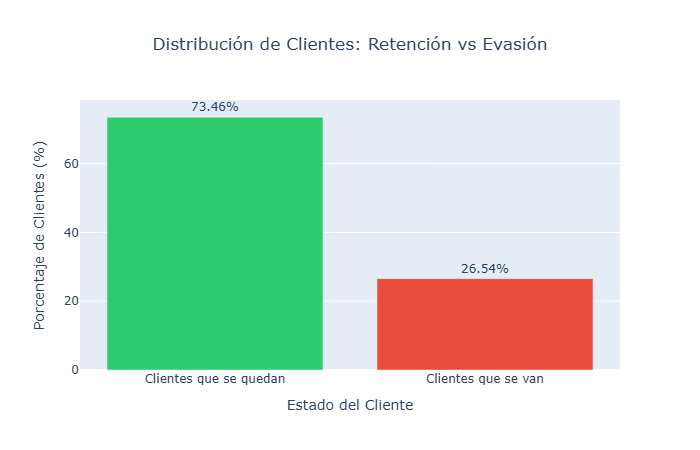

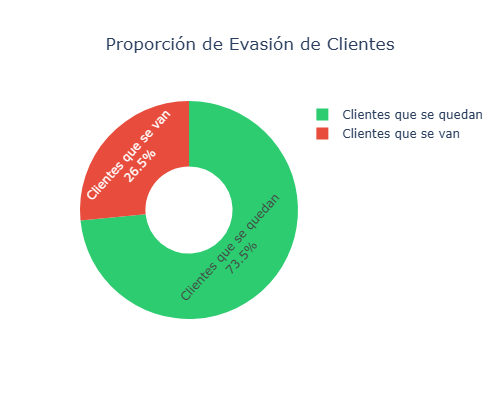

**Objetivo del Gráfico**

Mostrar la proporción de clientes que permanecen vs. clientes que se dan de baja

**Interpretación**

La visualización muestra una asimetría clara entre clientes que permanecen y clientes que se dan de baja.
Si bien la mayoría de los clientes continúa utilizando el servicio, el porcentaje de evasión es significativo y no marginal, lo que indica un problema estructural y no casos aislados.

Este comportamiento justifica la necesidad de profundizar el análisis, ya que una reducción moderada del churn tendría un impacto positivo directo en los ingresos y la estabilidad del negocio

###**Evasión según Variables Demográficas (Género)**

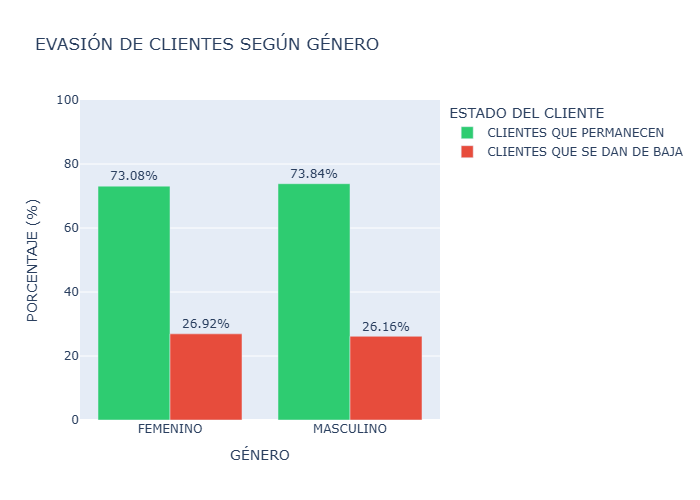

**Interpretación**

El análisis evidencia que la tasa de evasión es muy similar entre géneros, sin diferencias estadísticamente relevantes.
Esto sugiere que el género no es un factor determinante en la decisión de abandono, por lo que no sería eficiente diseñar estrategias de retención segmentadas por esta variable.

**Insight clave:**

Las causas del churn no están asociadas a características demográficas básicas, sino a factores contractuales y económicos.

###**Evasión según el Tipo de Contrato**

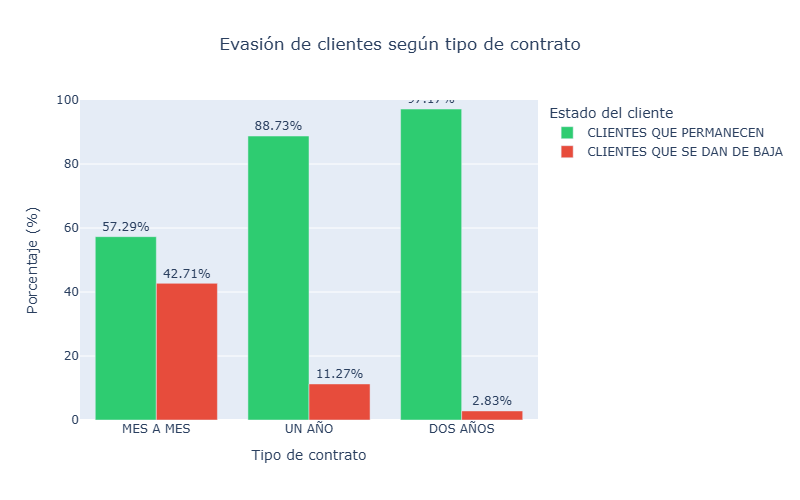

**Interpretación**

Este análisis revela uno de los hallazgos más importantes del estudio.
Los clientes con contrato mensual presentan una tasa de evasión significativamente superior en comparación con aquellos que poseen contratos anuales o bianuales.

Esto indica que:

* La falta de compromiso a largo plazo aumenta la probabilidad de abandono.

* Los contratos de mayor duración actúan como un factor protector frente al churn.

**Insight clave:**

Promover contratos de largo plazo puede ser una estrategia efectiva de retención.

###**Evasión según Método de Pago**

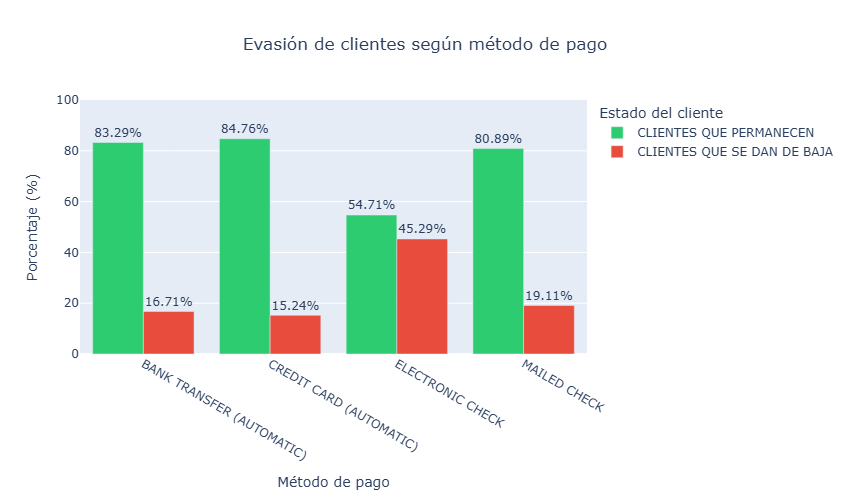

**Interpretación**

Se observa que los clientes que utilizan Electronic Check presentan una tasa de evasión considerablemente mayor que aquellos que utilizan métodos de pago automáticos (tarjeta de crédito o débito).

Este patrón sugiere que:

* Los pagos manuales generan mayor fricción.

* La falta de automatización puede reflejar menor compromiso con el servicio.

**Insight clave:**

Fomentar métodos de pago automáticos puede reducir el churn al disminuir barreras operativas.

###**Facturación Electrónica y Evasión**

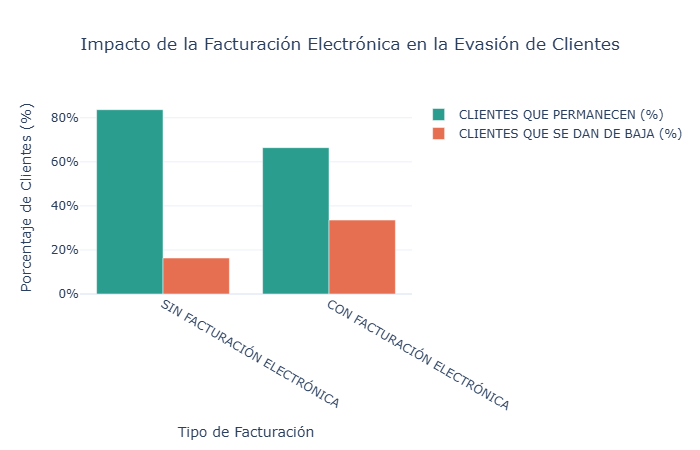

**Interpretación**

Los clientes que utilizan facturación electrónica muestran una mayor propensión a darse de baja.
Esto puede deberse a que este grupo suele estar asociado a:

* Contratos mensuales

* Clientes más recientes

* Mayor sensibilidad al precio

**Insight clave:**

La facturación electrónica, combinada con otros factores, puede servir como indicador temprano de riesgo de evasión.

###**Servicios Contratados y Evasión**

####**Tipo de Servicio de Internet**

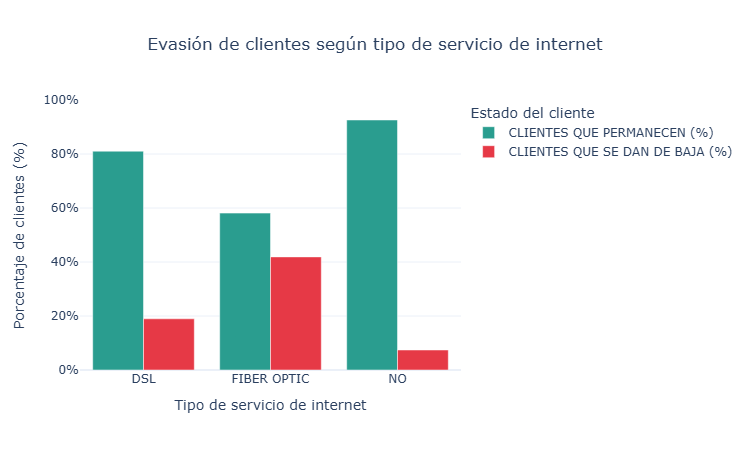

**Interpretación**

Los clientes con fibra óptica presentan una tasa de evasión más elevada que aquellos con DSL.
Esto podría estar relacionado con:

* Tarifas más altas

* Mayores expectativas de calidad del servicio

**Insight clave:**

Los clientes premium son más exigentes y requieren una mejor experiencia para evitar la evasión.

####**Servicios de Seguridad y Soporte Técnico**

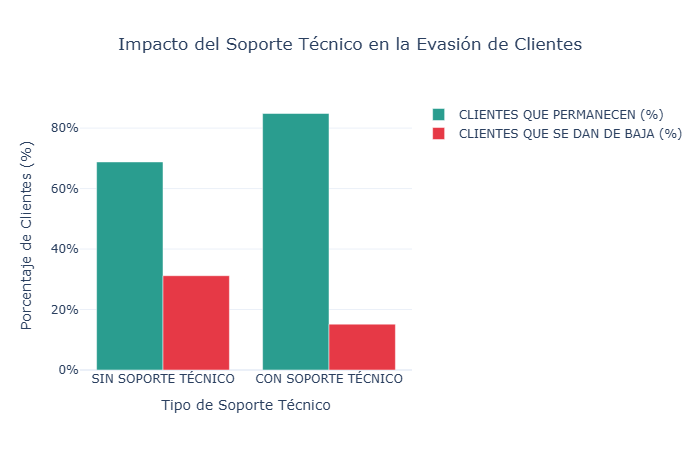

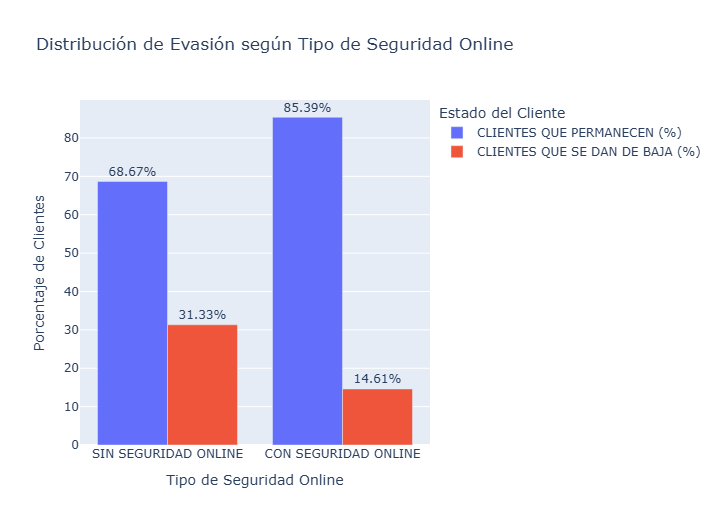

**Interpretación**

La ausencia de servicios de valor agregado, como seguridad online y soporte técnico, está claramente asociada con una mayor tasa de evasión.

Esto indica que:

* Estos servicios incrementan la percepción de valor.

* Funcionan como un mecanismo de fidelización.

**Insight clave:**

Ofrecer paquetes que incluyan estos servicios puede reducir significativamente el churn.

###**Análisis de Variables Numéricas**

####**Antigüedad del Cliente (Tenure)**

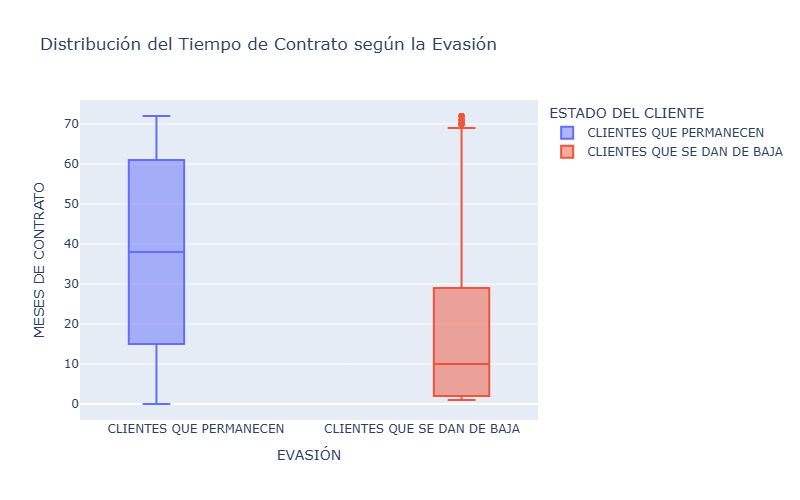

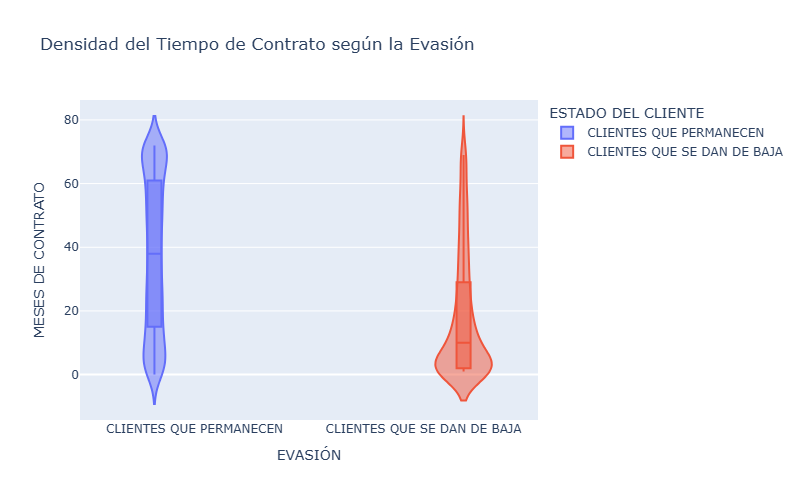

**Interpretación**

Los clientes que se dan de baja presentan:

* Menor antigüedad promedio

* Mayor concentración en los primeros meses del contrato

Esto confirma que el riesgo de evasión es mayor en las primeras etapas del ciclo de vida del cliente.

**Insight clave:**

Las estrategias de retención deben enfocarse especialmente en los primeros meses de relación.

####**Cargo Mensual**

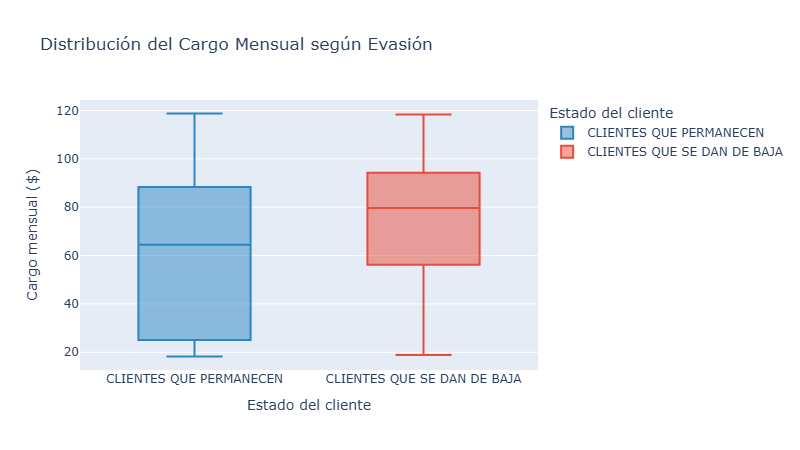


**Interpretación**

Los clientes que abandonan el servicio pagan, en promedio, cargos mensuales más elevados.
Esto sugiere una relación directa entre sensibilidad al precio y evasión.

**Insight clave:**

Revisar la estructura de precios y ofrecer beneficios percibidos puede reducir la tasa de churn.

####**Total Gastado**

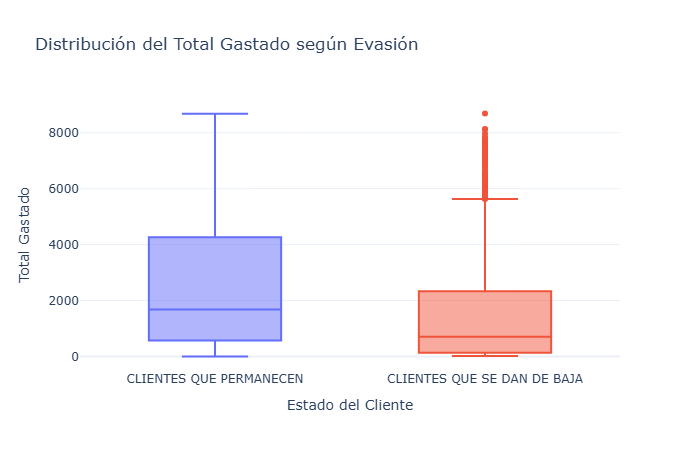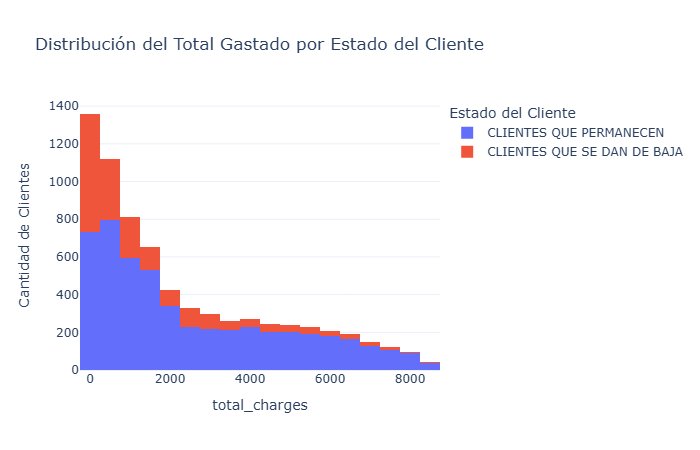

**Interpretación**

Los clientes que permanecen generan un mayor valor económico acumulado, mientras que los clientes que se dan de baja tienen un gasto total significativamente menor.

Esto refuerza la idea de que:

* El churn afecta principalmente a clientes de baja permanencia

* Retener clientes es clave para maximizar el valor de vida del cliente (CLV)

###**Análisis Combinado: Antigüedad vs Cargo Mensual**

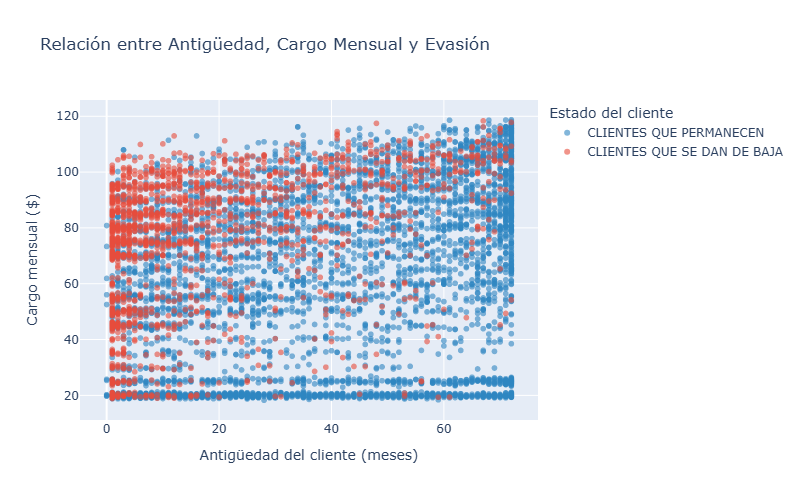

**Interpretación**

Este análisis permite identificar un segmento crítico de alto riesgo:

* Clientes con baja antigüedad

* Cargos mensuales elevados

Estos clientes concentran una alta probabilidad de evasión y deben ser el foco principal de las estrategias preventivas.

##**Conclusiones e Insights**



A partir del análisis exploratorio de datos realizado, se identificaron patrones claros y consistentes asociados a la evasión de clientes (Churn). Los resultados permiten comprender mejor qué perfiles de clientes presentan mayor riesgo de abandono y cuáles son los factores que influyen de forma más significativa en esta decisión.

**Principales conclusiones**

1. La evasión no está asociada a variables demográficas básicas
Variables como el género no muestran diferencias relevantes en las tasas de churn. Esto indica que el abandono del servicio no depende de características personales, sino de factores relacionados con la experiencia, el costo y el tipo de relación contractual.

2. El tipo de contrato es el factor más determinante del churn
Los clientes con contratos mensuales presentan una tasa de evasión considerablemente más alta que aquellos con contratos anuales o bianuales.
Esto demuestra que la falta de compromiso a largo plazo incrementa el riesgo de abandono, mientras que los contratos extensos funcionan como un mecanismo de retención natural.

3. Los métodos de pago automáticos reducen la evasión
Los clientes que utilizan pagos automáticos (tarjeta o transferencia bancaria) presentan tasas de churn más bajas que aquellos que utilizan pagos manuales, especialmente el Electronic Check.
Esto sugiere que la fricción en el proceso de pago influye negativamente en la permanencia del cliente.

4. Los servicios de valor agregado disminuyen el churn
La ausencia de soporte técnico y seguridad online está asociada con mayores tasas de evasión.
Estos servicios aumentan la percepción de valor y generan una relación más sólida entre el cliente y la empresa.

5. La evasión ocurre principalmente en los primeros meses del contrato
Los clientes que se dan de baja presentan una antigüedad significativamente menor que aquellos que permanecen.
Esto confirma que los primeros meses son críticos y representan la etapa de mayor riesgo.

6. Existe una relación entre precio y evasión
Los clientes que abandonan el servicio pagan, en promedio, cargos mensuales más altos, lo que indica sensibilidad al precio.
Además, el total gastado acumulado es menor en clientes con churn, reflejando una menor permanencia y menor valor de vida del cliente.

7. La combinación de variables revela segmentos críticos
El análisis conjunto de antigüedad y cargos mensuales permitió identificar un grupo de alto riesgo:
clientes recientes con cargos mensuales elevados.
Este segmento requiere atención prioritaria en estrategias de retención.

###**Recomendaciones Estratégicas**

En base a los insights obtenidos, se proponen las siguientes acciones estratégicas orientadas a reducir la evasión de clientes:

1. Incentivar contratos de largo plazo

* Ofrecer descuentos, beneficios exclusivos o mejoras de servicio para contratos anuales y bianuales.

* Implementar campañas de migración desde contratos mensuales hacia planes de mayor duración.

**Impacto esperado:**
reducción significativa del churn estructural.

2. Fortalecer la experiencia del cliente en los primeros meses

* Implementar programas de onboarding.

* Seguimiento proactivo durante los primeros 3 a 6 meses.

* Comunicación personalizada para nuevos clientes.

**Impacto esperado:** reducción del abandono temprano.

3. Promover métodos de pago automáticos

* Incentivar el uso de tarjetas o transferencias automáticas mediante descuentos o beneficios.

* Reducir la dependencia de métodos manuales como Electronic Check.

**Impacto esperado:** menor fricción operativa y mayor retención.

4. Potenciar servicios de valor agregado

* Ofrecer paquetes que incluyan soporte técnico y seguridad online.

* Comunicar claramente el valor de estos servicios al cliente.

**Impacto esperado:** mayor percepción de valor y fidelización.

5. Revisar la estrategia de precios

* Analizar la competitividad de los cargos mensuales.

* Ofrecer alternativas o beneficios a clientes con tarifas más altas.

**Impacto esperado:** reducción de la sensibilidad al precio.

6. Implementar modelos predictivos de churn (siguiente paso)

* Utilizar las variables identificadas para construir un modelo de predicción.

* Detectar clientes con alto riesgo de evasión antes de que ocurra.

**Impacto esperado:** acciones preventivas basadas en datos.

###**Cierre**

Este análisis demuestra cómo el uso de datos y visualizaciones permite transformar información en decisiones estratégicas concretas.
Comprender el comportamiento de los clientes es clave para reducir la evasión, mejorar la experiencia y aumentar la rentabilidad del negocio.

##**¡Extra! Análisis de correlación entre variables**

**Selección de variables para la correlación**

In [165]:
cols_corr = [
    "churn",
    "tenure_months",
    "monthly_charges",
    "total_charges",
    "daily_charges"
]

df_corr = df[cols_corr]


In [167]:
# Ahora calculamos la correlación utilizando Pearson, que es la más común para variables numéricas.
corr_matrix = df_corr.corr().round(2)
corr_matrix


,churn,tenure_months,monthly_charges,total_charges,daily_charges
churn,1.00,-0.35,0.19,-0.20,0.19
tenure_months,-0.35,1.00,0.25,0.83,0.25
monthly_charges,0.19,0.25,1.00,0.65,1.00
total_charges,-0.20,0.83,0.65,1.00,0.65
daily_charges,0.19,0.25,1.00,0.65,1.00


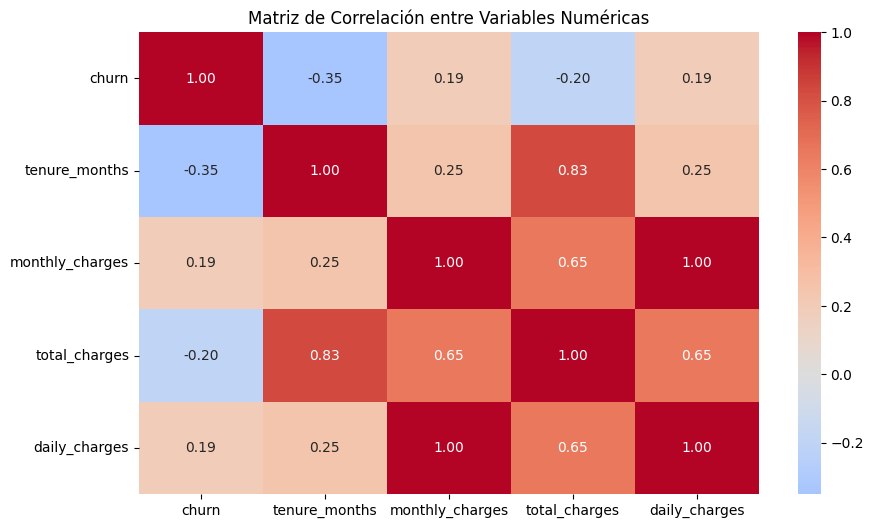

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


**Relación específica: Daily Charges vs Churn**

In [170]:
df.groupby("churn")["daily_charges"].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,2.04,1.04,0.61,0.84,2.15,2.95,3.96
1,1869.0,2.48,0.82,0.63,1.87,2.66,3.14,3.94


In [171]:
fig = px.box(
    df,
    x="churn",
    y="daily_charges",
    color="churn",
    labels={
        "churn": "Evasión",
        "daily_charges": "Cargo Diario"
    },
    title="Distribución del Cargo Diario según Evasión"
)

fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=["CLIENTES QUE PERMANECEN", "CLIENTES QUE SE DAN DE BAJA"]
)

fig.update_layout(width=700, height=450)
fig.show()

**Interpretación**

* Los clientes que se dan de baja presentan cargos diarios más altos

* Refuerza la hipótesis de sensibilidad al precio

##**Cantidad de servicios vs Churn (Insight avanzado)**

In [172]:
services_cols = [
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies"
]

df["num_services"] = df[services_cols].sum(axis=1)


In [175]:
df_services = df.copy()

for col in services_cols:
    df_services[col] = df_services[col].map({"yes": 1, "no": 0})



In [177]:
df_services["num_services"] = df_services[services_cols].sum(axis=1)



In [178]:
tabla_servicios = (
    df_services
    .groupby("num_services")["churn"]
    .mean()
    .round(3) * 100
)

tabla_servicios


,churn
num_services,
0,21.4
1,45.8
2,35.8
3,27.4
4,22.3
5,12.4
6,5.3


In [186]:
# Renombrar columnas para claridad
tabla_servicios = (
    tabla_servicios
    .rename("TASA DE EVASIÓN (%)")
)

tabla_servicios.index.name = "CANTIDAD DE SERVICIOS CONTRATADOS"

# Estilización
tabla_servicios.to_frame().style \
    .format("{:.1f}%") \
    .set_caption("Relación entre la Cantidad de Servicios y la Evasión de Clientes") \
    .set_table_styles([
        {"selector": "caption",
         "props": [("font-size", "16px"),
                   ("font-weight", "bold"),
                   ("text-align", "center")]},
        {"selector": "th",
         "props": [("text-align", "center"),
                   ("background-color", "#1f2937"),
                   ("color", "white")]},
        {"selector": "td",
         "props": [("text-align", "center")]}
    ]) \
    .background_gradient(
        cmap="Reds",
        subset=None
    )

,TASA DE EVASIÓN (%)
CANTIDAD DE SERVICIOS CONTRATADOS,
0,21.4%
1,45.8%
2,35.8%
3,27.4%
4,22.3%
5,12.4%
6,5.3%


In [188]:
labels_servicios = {
    0: "SIN SERVICIOS",
    1: "1 SERVICIO",
    2: "2 SERVICIOS",
    3: "3 SERVICIOS",
    4: "4 SERVICIOS",
    5: "5 SERVICIOS",
    6: "6 SERVICIOS"
}


In [189]:
tabla_servicios.index = tabla_servicios.index.map(labels_servicios)
tabla_servicios


,TASA DE EVASIÓN (%)
CANTIDAD DE SERVICIOS CONTRATADOS,
SIN SERVICIOS,21.4
1 SERVICIO,45.8
2 SERVICIOS,35.8
3 SERVICIOS,27.4
4 SERVICIOS,22.3
5 SERVICIOS,12.4
6 SERVICIOS,5.3


In [190]:
fig = px.bar(
    tabla_servicios.reset_index(),
    x="CANTIDAD DE SERVICIOS CONTRATADOS",
    y="TASA DE EVASIÓN (%)",
    text="TASA DE EVASIÓN (%)",
    title="La evasión disminuye a medida que el cliente contrata más servicios"
)

fig.update_traces(
    texttemplate="%{text:.1f}%",
    textposition="outside",
    marker_color="#ef4444"
)

fig.update_layout(
    width=750,
    height=450,
    xaxis_title="Cantidad de servicios contratados por el cliente",
    yaxis_title="Porcentaje de clientes que se dan de baja",
    yaxis_tickformat=".0f%",
    title_font_size=18,
    plot_bgcolor="white"
)

fig.show()



**Análisis de correlación: cantidad de servicios y evasión**

El análisis revela una relación inversa entre la cantidad de servicios contratados y la tasa de evasión. Los clientes que poseen un único servicio presentan la mayor tasa de cancelación (45.8%), lo que sugiere un bajo nivel de compromiso con la empresa. En contraste, aquellos clientes que contratan cinco o más servicios muestran una tasa de evasión significativamente menor (entre 12.4% y 5.3%), evidenciando un mayor grado de fidelización.

Este patrón indica que la diversificación de servicios actúa como un factor protector frente a la cancelación, ya que incrementa el valor percibido y la dependencia del ecosistema de la empresa.